# tourism cost Notebook


This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing
- Creating multiple models

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.metrics import accuracy_score, classification_report,plot_confusion_matrix,mean_absolute_error
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_val_score

#preprocessing module
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split ,KFold,RandomizedSearchCV,GridSearchCV
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor


##feature Scaling
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

###  Load the dataset

In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

###  Data Assessing

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (4809, 23)
test data shape : (1601, 22)


In [4]:
# inspect train data
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [5]:
# inspect test data
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [6]:
# inspect data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

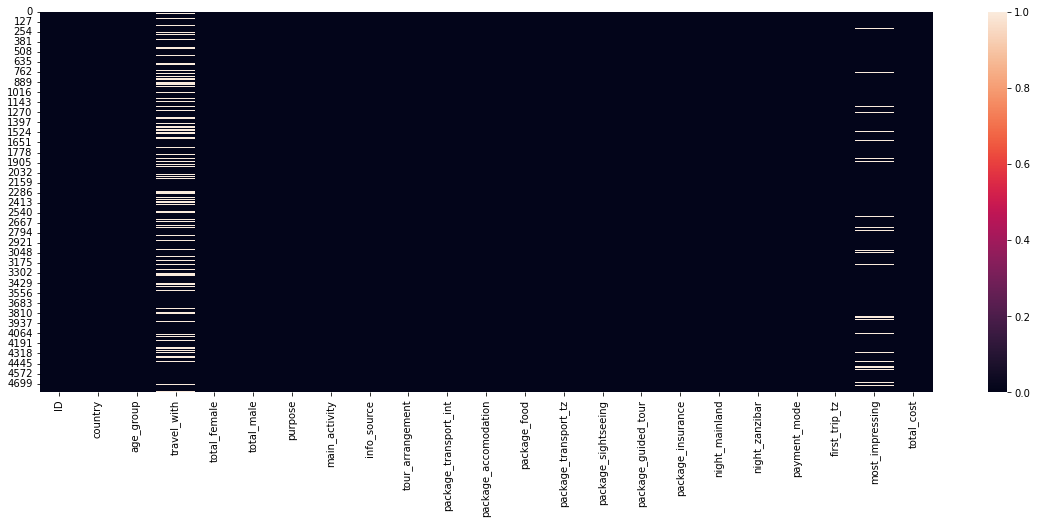

In [8]:
#check missing values in train data
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(train.isnull(), vmin=0, vmax = 1)

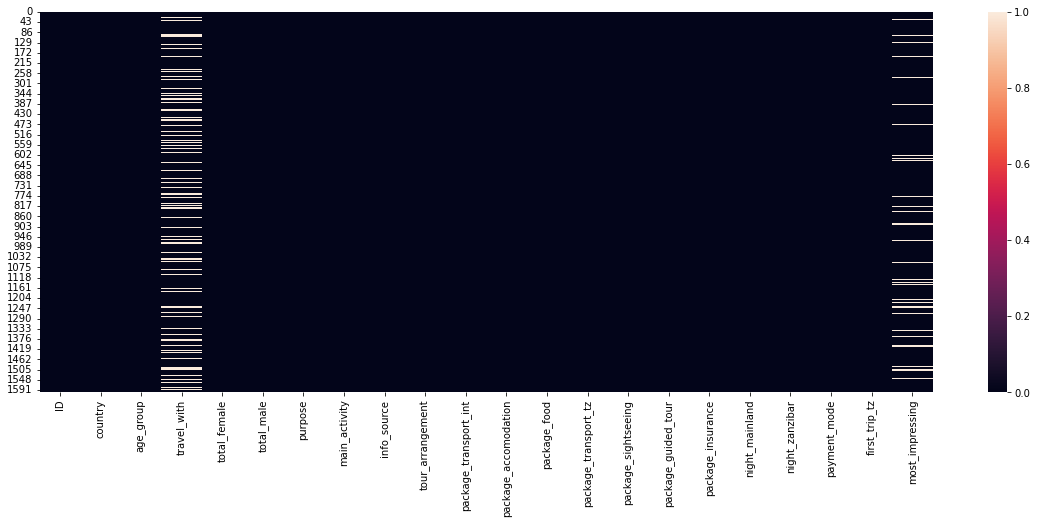

In [9]:
#check missing values in test data
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(test.isnull(), vmin=0, vmax = 1)

- there seems to be missing data in both train ad test dataset

##  Data Cleaning

In [10]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [11]:
# filling missing values in train data with thier mean value

train.total_female.fillna(train.total_female.mean(),inplace = True)
train.total_male.fillna(train.total_male.mean(),inplace = True)

In [12]:
# filling missing values in test data with thier mean value

test.total_female.fillna(test.total_female.mean(),inplace = True)
test.total_male.fillna(test.total_male.mean(),inplace = True)

In [13]:
# For the travel_with and most_impressing columns, fill in with another category, None
train.travel_with.fillna('None',inplace=True)
train.most_impressing.fillna('None',inplace=True)

test.travel_with.fillna('None',inplace=True)
test.most_impressing.fillna('None',inplace=True)

##  Feature Engineering 

In [14]:
#check for no of unique columns

for name in train.columns:
    unique_values = train[name].nunique()
    print(f"Feature '{name}' has '{unique_values}' unique values")

Feature 'ID' has '4809' unique values
Feature 'country' has '105' unique values
Feature 'age_group' has '4' unique values
Feature 'travel_with' has '6' unique values
Feature 'total_female' has '15' unique values
Feature 'total_male' has '15' unique values
Feature 'purpose' has '7' unique values
Feature 'main_activity' has '9' unique values
Feature 'info_source' has '8' unique values
Feature 'tour_arrangement' has '2' unique values
Feature 'package_transport_int' has '2' unique values
Feature 'package_accomodation' has '2' unique values
Feature 'package_food' has '2' unique values
Feature 'package_transport_tz' has '2' unique values
Feature 'package_sightseeing' has '2' unique values
Feature 'package_guided_tour' has '2' unique values
Feature 'package_insurance' has '2' unique values
Feature 'night_mainland' has '64' unique values
Feature 'night_zanzibar' has '34' unique values
Feature 'payment_mode' has '4' unique values
Feature 'first_trip_tz' has '2' unique values
Feature 'most_impre

In [15]:
le = LabelEncoder()

# function to preprocess our data from train models
def preprocess_data(data):

    
    # categorical features to be onverted to One Hot Encoding
    categ = ['tour_arrangement','travel_with','purpose','main_activity',
             'info_source','most_impressing','payment_mode']
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ,drop_first=True)

    

    #Encoding categorical Data
    data['age_group'] = le.fit_transform(data['age_group'])
    data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
    data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
    data['package_food'] = le.fit_transform(data['package_food'])
    data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
    data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
    data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
    data['package_insurance'] = le.fit_transform(data['package_insurance'])
    data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
    data['country'] = le.fit_transform(data['country'])
    
    # drop uniquid column
    data = data.drop(["ID"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    
    
    return data 

In [16]:
#Separate training features from target
X_train  = train.drop(columns=[ 'total_cost'])
y_train  = train['total_cost']

In [17]:
# preprocess the data 
processed_train = preprocess_data(X_train)
processed_test = preprocess_data(test)

In [18]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, 
                                                  test_size = 0.1, random_state=42)

## model building using CATBoost

In [19]:
cat_model=CatBoostRegressor()

In [20]:
# Optimize model parameters
param_grid2 = {'learning_rate':[0.1,0.05],
        'n_estimators':[800,600,500],
        'od_wait':[50],
        'reg_lambda':[3],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
model = GridSearchCV(cat_model, param_grid2,n_jobs=-1,verbose=2)

In [ ]:
kf = KFold(5,shuffle=True,random_state=101)
cross_val_score(model,X_Train,y_Train,cv=kf,scoring='neg_mean_absolute_error')

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
model.fit(X_Train,y_Train)
print(model.best_params_)

In [ ]:
# Get the predicted result for the test Data

y_pred = model.predict(X_Val) 

In [ ]:
print("Error rate of catboost regressor: ", mean_absolute_error(y_val,y_pred))

## model building using LGBM

In [ ]:
# Optimize model parameters
param_grid = {'num_leaves':[5,10],
        'n_estimators':[50,80,100],
        'feature_fraction':[0.4,0.45,0.43],
        'reg_lambda':[0.5,0.6,0.4],
        'subsample': [0.6, 0.7],
        'max_depth': [3, 5,7 ]
        }

In [ ]:
lgbm = LGBMRegressor()


In [ ]:
model2 = GridSearchCV(lgbm, param_grid,cv=5,n_jobs=-1,verbose=2)

In [ ]:
kf = KFold(5,shuffle=True,random_state=101)
cross_val_score(model2,X_Train,y_Train,cv=kf,scoring='neg_mean_absolute_error')

In [ ]:
model2.fit(X_Train,y_Train)
print(model.best_params_)

In [ ]:
pred = model2.predict(X_Val) 

## model evaluation

In [ ]:
print("Error rate of lgbm regressor: ", mean_absolute_error(y_val, pred))

## model bagging

In [ ]:
bag_reg = BaggingRegressor(model, n_estimators=50, max_samples=3000, bootstrap=True, n_jobs=-1, random_state=0)

In [ ]:
kf = KFold(5,shuffle=True,random_state=101)
cross_val_score(bag_reg,X_Train,y_Train,cv=kf,scoring='neg_mean_absolute_error')

In [ ]:
bag_reg.fit(X_Train,y_Train)

In [ ]:
y_pred2 = bag_reg.predict(X_Val)
print("Error rate of baggng regressor: ", mean_absolute_error(y_val, y_pred2))

In [ ]:
p3 = bag_reg.predict(processed_test)